In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
import seaborn as sns

In [2]:
dataset = pd.read_csv("dataset.csv")
y = dataset['logS']
X = dataset.iloc[:,5:-6]
dataset.columns = dataset.columns.to_series().apply(lambda x: x.strip())

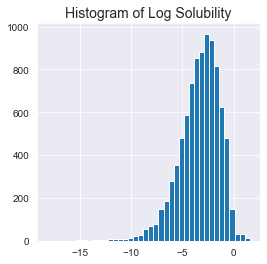

In [3]:
fig, ax = plt.subplots(figsize=(4,4))
ax.hist(y, bins=40)
ax.set_title("Histogram of Log Solubility", fontsize=14);

In [4]:
from sklearn.preprocessing import StandardScaler
print(dataset.columns[5:-6])
np.set_printoptions(threshold=np.inf)
col_labels = dataset.columns[5:-6]
X = X.to_numpy()
scaler=StandardScaler()
X = scaler.fit_transform(X)
N, p = X.shape
print(X.shape)
print(y.shape)

Index(['MinEStateIndex', 'MaxAbsEStateIndex', 'MinAbsEStateIndex', 'qed',
       'MolWt', 'HeavyAtomMolWt', 'ExactMolWt', 'NumValenceElectrons',
       'NumRadicalElectrons', 'MaxPartialCharge',
       ...
       'fr_sulfide', 'fr_sulfonamd', 'fr_sulfone', 'fr_term_acetylene',
       'fr_tetrazole', 'fr_thiazole', 'fr_thiocyan', 'fr_thiophene',
       'fr_unbrch_alkane', 'fr_urea'],
      dtype='object', length=207)
(8883, 207)
(8883,)


In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

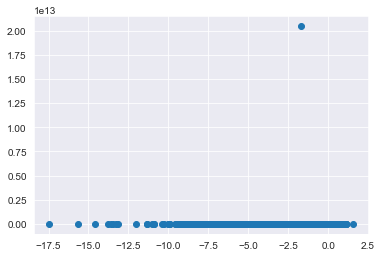

1.5694639789315525e+23
Feature MaxAbsEStateIndex: -0.074084
Feature MinAbsEStateIndex: 0.034142
Feature qed: 0.304624
Feature MolWt: 2396.184767
Feature HeavyAtomMolWt: -2059.596132
Feature ExactMolWt: -193.294995
Feature NumValenceElectrons: -21.295526
Feature NumRadicalElectrons: -0.014923
Feature MaxPartialCharge: -117955096472.878082
Feature MinPartialCharge: 241333048119.246490
Feature MaxAbsPartialCharge: 238863454362.871429
Feature MinAbsPartialCharge: 114062265493.332886
Feature FpDensityMorgan1: 0.463729
Feature FpDensityMorgan2: -0.227726
Feature FpDensityMorgan3: -0.132855
Feature BCUT2D_MWHI: 0.056783
Feature BCUT2D_MWLOW: -0.025842
Feature BCUT2D_CHGHI: -0.009218
Feature BCUT2D_CHGLO: -0.152268
Feature BCUT2D_LOGPHI: 0.053107
Feature BCUT2D_LOGPLOW: -0.037050
Feature BCUT2D_MRHI: -0.053812
Feature BCUT2D_MRLOW: 0.122254
Feature BalabanJ: 0.070707
Feature BertzCT: 2.621019
Feature Chi0: -41.838607
Feature Chi0n: -218.148669
Feature Chi0v: -19.374325
Feature Chi1: 17.402756


In [7]:
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression,Ridge

lin_reg = LinearRegression()
lin_reg.fit(X_train,y_train)
predictions = lin_reg.predict(X_test)
plt.scatter(y_test, predictions)
plt.show()
print(mean_squared_error(y_test,predictions))
x_features = []
for i in range(1,len(lin_reg.coef_)):
    if lin_reg.coef_[i]==0:
        pass
    else:
        x_features.append(dataset.columns[i+5].strip())
        print('Feature %s: %f' % (dataset.columns[i+5], lin_reg.coef_[i]))
print(len(x_features))

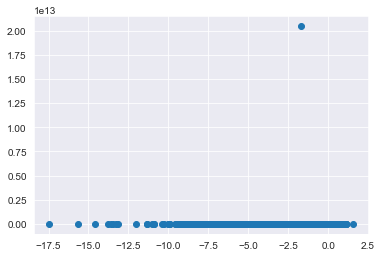

1.5694639789315525e+23
Feature MaxAbsEStateIndex: -0.074084
Feature MinAbsEStateIndex: 0.034142
Feature qed: 0.304624
Feature MolWt: 2396.184767
Feature HeavyAtomMolWt: -2059.596132
Feature ExactMolWt: -193.294995
Feature NumValenceElectrons: -21.295526
Feature NumRadicalElectrons: -0.014923
Feature MaxPartialCharge: -117955096472.878082
Feature MinPartialCharge: 241333048119.246490
Feature MaxAbsPartialCharge: 238863454362.871429
Feature MinAbsPartialCharge: 114062265493.332886
Feature FpDensityMorgan1: 0.463729
Feature FpDensityMorgan2: -0.227726
Feature FpDensityMorgan3: -0.132855
Feature BCUT2D_MWHI: 0.056783
Feature BCUT2D_MWLOW: -0.025842
Feature BCUT2D_CHGHI: -0.009218
Feature BCUT2D_CHGLO: -0.152268
Feature BCUT2D_LOGPHI: 0.053107
Feature BCUT2D_LOGPLOW: -0.037050
Feature BCUT2D_MRHI: -0.053812
Feature BCUT2D_MRLOW: 0.122254
Feature BalabanJ: 0.070707
Feature BertzCT: 2.621019
Feature Chi0: -41.838607
Feature Chi0n: -218.148669
Feature Chi0v: -19.374325
Feature Chi1: 17.402756


In [8]:
lin_reg = LinearRegression()
lin_reg.fit(X_train,y_train)
predictions = lin_reg.predict(X_test)
plt.scatter(y_test, predictions)
plt.show()
print(mean_squared_error(y_test,predictions))
second_x_features = []
for i in range(1,len(lin_reg.coef_)):
    if lin_reg.coef_[i]==0:
        pass
    else:
        x_features.append(dataset.columns[i+5].strip())
        print('Feature %s: %f' % (dataset.columns[i+5], lin_reg.coef_[i]))
print(len(second_x_features))

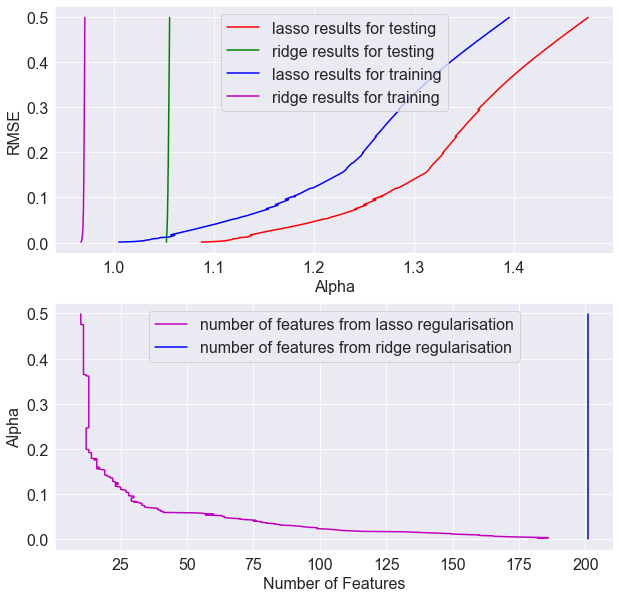

Lasso 10 186
Ridge 201 201


In [14]:
from sklearn import linear_model

# setting font sizeto 30
plt.rcParams.update({'font.size': 16})
plt.figure(figsize=(10, 10))

test_ridge_values = []
test_lasso_values = []
train_lasso_values = []
train_ridge_values =[]
no_of_feat_ridge = []
no_of_feat_lasso = []

X_axis = np.arange(0.001,0.5,0.001)

for i in X_axis:
    reg = linear_model.Ridge(alpha=i)
    reg.fit(X_train,y_train)
    ridgePredict = reg.predict(X_test)
    test_ridge_values.append(np.sqrt(mean_squared_error(y_test,ridgePredict)))
    train_ridgePredict = reg.predict(X_train)
    train_ridge_values.append(np.sqrt(mean_squared_error(y_train,train_ridgePredict)))
    no_of_feat_ridge.append(reg.coef_[reg.coef_!=0].shape[0])
    las = linear_model.Lasso(alpha=i,tol=0.1)
    las.fit(X_train,y_train)
    lassoPred = las.predict(X_test)
    train_lassoPred = las.predict(X_train)
    no_of_feat_lasso.append(las.coef_[las.coef_!=0].shape[0])
    train_lasso_values.append(np.sqrt(mean_squared_error(y_train,train_lassoPred)))
    test_lasso_values.append(np.sqrt(mean_squared_error(y_test,lassoPred)))

plt.subplot(2, 1, 1)
#Plotting both the curves simultaneously
plt.plot(test_lasso_values,X_axis, color='r', label='lasso results for testing')
plt.plot(test_ridge_values,X_axis, color='g', label='ridge results for testing')
plt.plot(train_lasso_values,X_axis , color='b', label='lasso results for training')
plt.plot(train_ridge_values,X_axis, color='m', label='ridge results for training')
plt.ylabel("RMSE")
plt.xlabel("Alpha")
plt.legend()
plt.subplot(2, 1, 2)
plt.plot(no_of_feat_lasso, X_axis, color='m', label='number of features from lasso regularisation')
plt.plot(no_of_feat_ridge, X_axis, color='b', label='number of features from ridge regularisation')
plt.xlabel("Number of Features")
plt.ylabel("Alpha")
plt.legend()
plt.savefig("graphs.png")
plt.show()
print('Lasso' + ' ' + str(np.amin(no_of_feat_lasso)) + ' ' + str(np.amax(no_of_feat_lasso)))
print('Ridge' + ' ' + str(np.amin(no_of_feat_ridge)) + ' ' + str(np.amax(no_of_feat_ridge)))


In [ ]:
from sklearn.feature_selection import SelectKBest,chi2
from sklearn.feature_selection import f_regression
import string
import math
# feature selection

def select_features(X_train, y_train, X_test):
    # configure to select all features
    fs = SelectKBest(score_func=f_regression, k='all')
    # learn relationship from training data
    fs.fit(X_train, y_train)
    # transform train input data
    X_train_fs = fs.transform(X_train)
    # transform test input data
    X_test_fs = fs.transform(X_test)
    return X_train_fs, X_test_fs, fs
X_train_fs, X_test_fs, fs = select_features(X_train, y_train, X_test)
features = {}
x_features = []
for i in range(len(fs.scores_)):
    features[i] = fs.scores_[i]
#what are scores for the features

for i in dict(sorted(features.items(), key=lambda x:x[1], reverse=True)):
    if math.isnan(features[i]):
        features.pop(i)
    else:
        x_features.append(dataset.columns[i].strip())
        print('Feature %s: %f' % (dataset.columns[i+5], features[i]))
print(len(features))

In [ ]:
# example of correlation feature selection for numerical data
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
from matplotlib import pyplot
 
# feature selection
def select_features(X_train, y_train, X_test):
 # configure to select all features
 fs = SelectKBest(score_func=f_regression, k='all')
 # learn relationship from training data
 fs.fit(X_train, y_train)
 # transform train input data
 X_train_fs = fs.transform(X_train)
 # transform test input data
 X_test_fs = fs.transform(X_test)
 return X_train_fs, X_test_fs, fs
 

X_train_fs, X_test_fs, fs = select_features(X_train, y_train, X_test)
# what are scores for the features
for i in range(len(fs.scores_)):
 print('Feature %d: %f' % (i, fs.scores_[i]))
# plot the scores
pyplot.bar([i for i in range(len(fs.scores_))], fs.scores_)
pyplot.show()
# fit the model
model = LinearRegression()
model.fit(X_train_fs, y_train)
# evaluate the model
yhat = model.predict(X_test_fs)
# evaluate predictions
print(mean_squared_error(y_test,yhat))

In [ ]:
from sklearn.feature_selection import RFECV
from sklearn.ensemble import RandomForestRegressor
#lin_reg = LinearRegression()
RF=RandomForestRegressor(random_state=0)
rfecv = RFECV(estimator= RF, scoring='neg_mean_squared_error')
rfecv.fit(X_train, y_train)
plt.title("RFECV ")
plt.xlabel("Number Of Features")
plt.ylabel("Accuracy")
plt.plot(range(1, len(rfecv.cv_results_['mean_test_score']) + 1), rfecv.cv_results_['mean_test_score'])
plt.show()

In [ ]:
lin_reg = LinearRegression()
rfecv = RFECV(estimator= lin_reg, scoring='neg_mean_squared_error')
rfecv.fit(X, y)
X_new = rfecv.transform(X)
print("Num Features Before:", X.shape[1])
print("Num Features After:", X_new.shape[1])

In [ ]:
rfecv.support_

In [ ]:
print('Optimal number of features :', rfecv.n_features_)
print('Best features :', dataset.columns[rfecv.support_])
print('Original features :', dataset.columns)
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score \n of number of selected features")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

In [3]:
from rdkit.ML.Cluster import Butina
from rdkit import Chem
from rdkit.Chem import rdFingerprintGenerator, Draw

# Clustering using RDKit
## Generating molecules from smiles and storing them with the husskonen id
# Create molecules from SMILES and store in array
compounds = []
# .itertuples() returns a (index, column1, column2, ...) tuple per row
# we don't need to index, so we use _ instead
# note how we are slicing the dataframe to only the two columns we need now
for _, chembl_id, smiles in dataset[["SMILES", "SMILES"]].itertuples():
    compounds.append((Chem.MolFromSmiles(smiles), chembl_id))
compounds = [tup for tup in compounds if tup[1] != None and tup[0] != None]
compounds[:5]

# Create fingerprints for all molecules
rdkit_gen = rdFingerprintGenerator.GetRDKitFPGenerator(5)
fingerprints = [rdkit_gen.GetFingerprint(mol) for mol, idx in compounds]

# How many compounds/fingerprints do we have?
print("Number of compounds converted:", len(fingerprints))
print("Fingerprint length per compound:", len(fingerprints[0]))

## Calculating the distance between molecules in the dataset which is going to be used to cluster the data
from rdkit import DataStructs


def tanimoto_distance_matrix(fp_list):
    """Calculate distance matrix for fingerprint list"""
    dissimilarity_matrix = []
    # Notice how we are deliberately skipping the first and last items in the list
    # because we don't need to compare them against themselves
    for i in range(1, len(fp_list)):
        # Compare the current fingerprint against all the previous ones in the list
        similarities = DataStructs.BulkTanimotoSimilarity(fp_list[i], fp_list[:i])
        # Since we need a distance matrix, calculate 1-x for every element in similarity matrix
        dissimilarity_matrix.extend([1 - x for x in similarities])
    return dissimilarity_matrix


# Side note: That looked like a list and not a matrix.
# But it is a triangular similarity matrix in the form of a list
n = len(fingerprints)

# Calculate number of elements in triangular matrix via n*(n-1)/2
elem_triangular_matr = (n * (n - 1)) / 2
print(
    f"Elements in the triangular matrix ({elem_triangular_matr:.0f}) ==",
    f"tanimoto_distance_matrix(fingerprints) ({len(tanimoto_distance_matrix(fingerprints))})",
)


## Method to cluster the data based on their fingerprints
def cluster_fingerprints(fingerprints, cutoff=0.2):
    """Cluster fingerprints
    Parameters:
        fingerprints
        cutoff: threshold for the clustering
    """
    # Calculate Tanimoto distance matrix
    distance_matrix = tanimoto_distance_matrix(fingerprints)
    # Now cluster the data with the implemented Butina algorithm:
    clusters = Butina.ClusterData(distance_matrix, len(fingerprints), cutoff, isDistData=True)
    clusters = sorted(clusters, key=len, reverse=True)
    return clusters

Number of compounds converted: 8879
Fingerprint length per compound: 2048
Elements in the triangular matrix (39413881) == tanimoto_distance_matrix(fingerprints) (39413881)


total # clusters:  5047
# clusters with only 1 compound:  3763
# clusters with >5 compounds:  191
# clusters with >25 compounds:  10
# clusters with >100 compounds:  2
Ten molecules from second largest cluster:


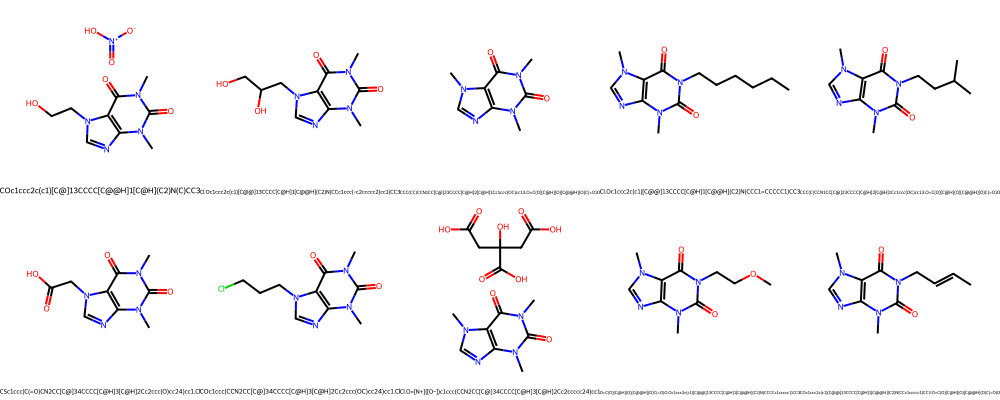

In [6]:


# Run the clustering procedure for the dataset
clusters = cluster_fingerprints(fingerprints, cutoff=0.20)

# Give a short report about the numbers of clusters and their sizes
num_clust_g1 = sum(1 for c in clusters if len(c) == 1)
num_clust_g5 = sum(1 for c in clusters if len(c) > 5)
num_clust_g25 = sum(1 for c in clusters if len(c) > 25)
num_clust_g100 = sum(1 for c in clusters if len(c) > 100)

print("total # clusters: ", len(clusters))
print("# clusters with only 1 compound: ", num_clust_g1)
print("# clusters with >5 compounds: ", num_clust_g5)
print("# clusters with >25 compounds: ", num_clust_g25)
print("# clusters with >100 compounds: ", num_clust_g100)
## Cluster visualisation
print("Ten molecules from second largest cluster:")
# Draw molecules
Draw.MolsToGridImage(
    [compounds[i][0] for i in clusters[10][:20]],
    legends=[compounds[i][1] for i in clusters[1][:20]],
    molsPerRow=5,
)

In [ ]:
for cutoff in np.arange(0.0, 1.0, 0.1):
    clusters = cluster_fingerprints(fingerprints, cutoff=cutoff)
    fig, ax = plt.subplots(figsize=(15, 4))
    ax.set_title(f"Threshold: {cutoff:3.2f}")
    ax.set_xlabel("Cluster index")
    ax.set_ylabel("Number of molecules")
    ax.bar(range(1, len(clusters) + 1), [len(c) for c in clusters], lw=5)
    display(fig)

In [ ]:
print("Ten molecules from first 10 clusters:")
# Draw molecules
Draw.MolsToGridImage(
    [compounds[clusters[i][0]][0] for i in range(30)],
    legends=[compounds[clusters[i][0]][1] for i in range(30)],
    molsPerRow=5,
)

In [ ]:
# Baseline score
plt.rcParams.update({'figure.figsize': (40,40)})
plt.rcParams.update({'font.size': 14})
from sklearn.inspection import permutation_importance
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
rf=RandomForestRegressor(random_state=0)
rf.fit(X_train, y_train)
perm_importance = permutation_importance(rf, X_test, y_test)
sorted_idx = perm_importance.importances_mean.argsort()
plt.barh(dataset.columns[sorted_idx], perm_importance.importances_mean[sorted_idx])
plt.xlabel("Permutation Importance")
#score=cross_val_score(perm_impor,X,y,cv=2,scoring='neg_mean_squared_error')
#score.mean()

In [ ]:
corr = dataset.iloc[:,3:-6].corr()[['logS']]
plt.figure(figsize=(150,150))
sns.heatmap(corr)
plt.tick_params(axis='y', labelsize=50)
plt.savefig("all_features_heatmap.png")

In [ ]:
print(dataset.columns[3:-6])